# A/B Test For The New Feature On The Home Page In The  Desktop Version 

One of our main goals at OLX is to connect buyers with sellers. A reply is when this connection happens.
With that goal in mind we recently did a change in our homepage search feature for desktop (in one of our products). It is now possible for users to filter by more characterisctics directly in the home page. This wasn't possible before
The change happened on the 16th Jan and there were some issues with the feature happening until the 22nd Jan.


**This is the dashboard created for our analysis**

In [1]:
%%html
<div class='tableauPlaceholder' id='viz1619639794787' style='position: relative'><noscript><a href='#'><img alt='Dashboard ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ol&#47;Olx&#47;Dashboard&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='Olx&#47;Dashboard' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ol&#47;Olx&#47;Dashboard&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1619639794787');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>


In [2]:
# Importing libraries

import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline 
sns.set(color_codes=True)
import warnings
warnings.filterwarnings("ignore")
from scipy import stats
from statsmodels.stats import weightstats as stests 

In [3]:
# Importing and checking the data

df = pd.read_excel('OLX Product Analyst Challenge.xlsx', sheet_name= 'data')
df.head()

,server_date_day,platform,user_id,session,Searches Home,Searches ListResult,Results Home,Results ListResult,Ads Returned Home,Ads Returned ListResult,replies
0,2019-01-14,desktop,8e070f35b443617993eeabac8559011f48785261,2460e8718b32522bf2f0a3173a593445f00a7151,0,7,0,6,NaN,485.0,0
1,2019-01-05,mobile-html5,07f94eb0f96e75b9189f352bb2220218826e4b7a,aaa840193a94f621622818d61212ecfadddaadb1,1,0,1,0,44.0,NaN,0
2,2019-02-05,mobile-html5,0ecd0b5d3af1c6235df58ed1ec37a3868fc24e7e,388d6a288b43ddc709013f458667a4f9f5497502,1,1,1,1,1710.0,1710.0,0
3,2019-02-14,mobile-html5,1f4de186eca5694ed8432b9820f391c51f05b2c2,1f4de186eca5694ed8432b9820f391c51f05b2c2,1,0,1,0,168.0,NaN,0
4,2019-01-16,desktop,0eaa62f6cfcab6e2b5705e6618971479f08e15b3,7fd25b8b061376e9b426e9a0e76665b909bf6e43,0,2,0,2,NaN,503.0,0


In [4]:
# Cheking nulls 

df.isnull().sum()

server_date_day               0
platform                      0
user_id                       0
session                       0
Searches Home                 0
Searches ListResult           0
Results Home                  0
Results ListResult            0
Ads Returned Home          8193
Ads Returned ListResult    6224
replies                       0
dtype: int64

Considering that the columns where there are null values are the columns of advertising return, I decided to **replace the nulls by zeros** understanding that when the values are null in these columns it means that there was no advertising return in that session

In [5]:
# Replacing nulls by zeros

df = df.fillna(0)

In [6]:
#there are no more null

df.isnull().sum()

server_date_day            0
platform                   0
user_id                    0
session                    0
Searches Home              0
Searches ListResult        0
Results Home               0
Results ListResult         0
Ads Returned Home          0
Ads Returned ListResult    0
replies                    0
dtype: int64

**Correlations Before the new feature**

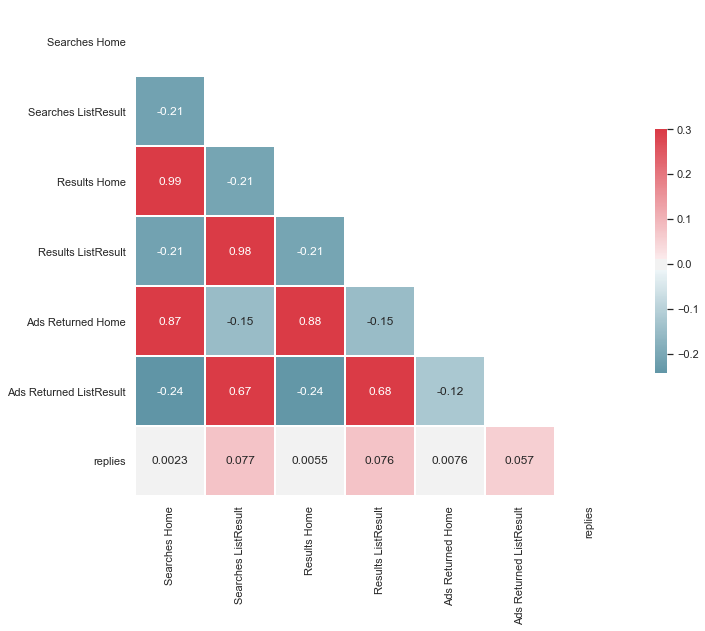

In [7]:
#Heat Map

dfb = df[(df['server_date_day']< '2019-01-16') & (df['platform'] == 'desktop')]
corr = dfb.corr('spearman')
sns.set(style="white")
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

**Correlations after the new feature**

In [8]:
dfa = df[(df['server_date_day']>= '2019-01-16') & (df['platform'] == 'desktop')]

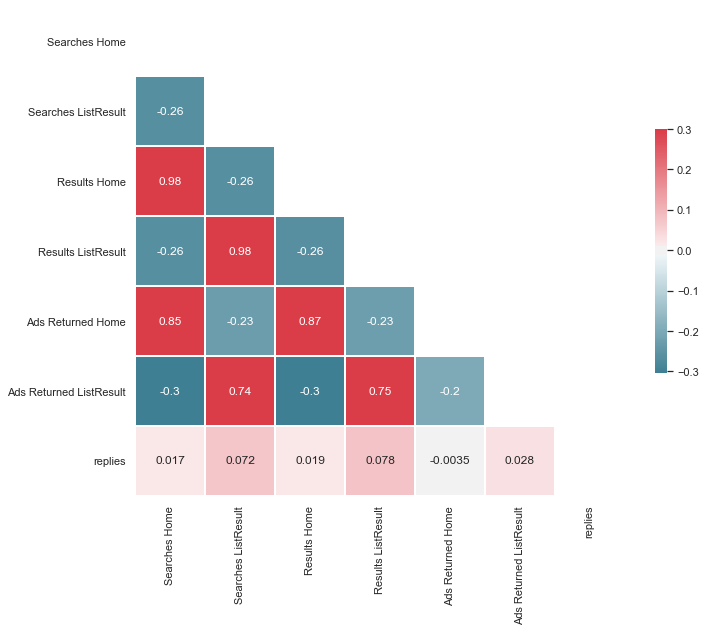

In [9]:
#Heat Map

corr = dfa.corr('spearman')
sns.set(style="white")
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

- Considering that the new feature is a filter on the home page, the correlation of replies per search on the home page increased after the new feature 
- An important metric to measure the efficiency of the new feature would be the number of clicks performed, but I don't have this information to deepen the analysis 
- The adds returned don't have correlation with the replies
- The improvement of the search results in the homepage with the filter implementation would justify the increase of the replies and search home correlation  

Since the replies are the main metric to look at in this dataset, let's look at the distribution of this data 

<AxesSubplot:xlabel='server_date_day'>

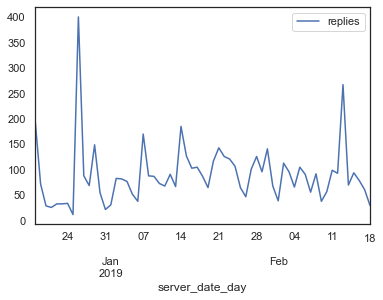

In [10]:
df.groupby('server_date_day').agg({'replies':'sum'}).plot()

This was the highest peak of replies in our dataset and for this we will take a closer look 

In [11]:
df.groupby('server_date_day').agg({'replies':'sum'}).loc['2018-12-26']

replies    400
Name: 2018-12-26 00:00:00, dtype: int64

# Outliers

In [12]:
df.describe()

,Searches Home,Searches ListResult,Results Home,Results ListResult,Ads Returned Home,Ads Returned ListResult,replies
count,20067.000000,20067.000000,20067.000000,20067.000000,20067.000000,2.006700e+04,20067.000000
mean,0.765236,1.842976,0.744207,1.656850,2827.704390,5.260390e+03,0.284098
std,0.859195,12.365284,0.831036,2.577911,14653.134154,3.946082e+04,3.282152
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
50%,1.000000,1.000000,1.000000,1.000000,28.000000,5.700000e+01,0.000000
75%,1.000000,2.000000,1.000000,2.000000,581.000000,5.800000e+02,0.000000
max,20.000000,1709.000000,20.000000,188.000000,532358.000000,3.060725e+06,381.000000


Apparently we have some big outliers in this dataset 

<AxesSubplot:xlabel='replies'>

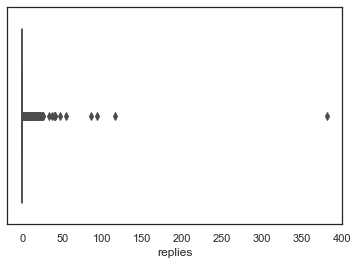

In [13]:
#Detecting Outliers

sns.boxplot(x=df['replies'])

Looking at our dataset, we can see that there is a **threshold around 70 replies** and for these we will look more closely 

In [14]:
df.loc[df['replies']>70]

,server_date_day,platform,user_id,session,Searches Home,Searches ListResult,Results Home,Results ListResult,Ads Returned Home,Ads Returned ListResult,replies
1037,2019-02-13,desktop,a16d67a49b455231c92bbe7909f0e83e30f2f09f,6061c25c5f6e827f349bb0926422aebfa6809ff1,1,16,1,16,1449.0,200.0,86
1110,2018-12-26,desktop,8189a5abe1e6448fbd574e3dbfb3f5792cc3ee82,ab2f39de49a1a254551e5f1ec0f0d48ff3cf7a01,2,9,2,9,25459.0,293.0,381
2820,2018-12-18,desktop,03f26c3b80beb6e6cfbaca5d047c8d2e4933641f,714a7dd1639c784bce5a50bd5ba615349fcbf8b2,1,2,1,2,13106.0,184.0,93
7628,2018-12-29,desktop,4eb5b2ab2b1a9913efb380830e3155a88b1e11b2,c7bb063341b79955882c8a1c2d12df0b902686d3,1,3,1,3,94716.0,66356.0,116


We can observe that we have at least 4 outliers that draw attention. Especially a big outlier on the 26th of December. Of the 400 responses on this day, 381 were made by a single user in the same session. **This fact caught my attention and makes me suspect that this user might actually be a bot**

Considering that these outlies can be a bias in our analysis, especially observing the hypothesis that at least one of them (December 26) can be, I decided to create a new measure in the dataset which I called **"Conversion"**

**The conversion happens when in a session, a user made at least one reply.**
By converting the replies in binary, being 0 when there was no reply and one when there was at least one reply, we eliminate the bias that the outlier can cause in our analysis

In [15]:
# Converting the replies in binary 

df['conversion'] = df['replies'].apply(lambda x: 1 if x>0 else 0 )

<AxesSubplot:xlabel='server_date_day'>

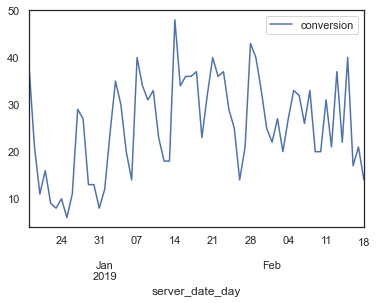

In [16]:
#Checking the distribution of conversions 

df.groupby('server_date_day').agg({'conversion':'sum'}).plot()

After converting the replies to binary, we can observe that we no longer have large biases in the data distribution 

# Applying the A/B Test

For this step, it is necessary to split the data into before (b) and after (a) the date of the new feature.
For the first test we will consider only the date of January 16th , and in the second test we will consider the date before the feature, the 16th , and after, the 22nd because as mentioned before, we had a period of problems between the 16th and the 22nd of January 

Considering that the new feature is only for the desktop platform, I decided to filter the data set only by this. 

**First test: Considering just the date before the new feature(16 January)**

In [17]:
# splitting and filtering

dfb = df[(df['server_date_day']< '2019-01-16') & (df['platform'] == 'desktop')]
dfa = df[(df['server_date_day']>= '2019-01-16') & (df['platform'] == 'desktop')]

In [18]:
ztest,pval = stests.ztest(dfb['replies'], dfa['replies'])

print(float(pval))
if pval<0.05:
    print("reject null hypothesis")
else:
    print("fail to reject the null hypothesis")

0.29047856830649876
fail to reject the null hypothesis


In [19]:
round(dfb['replies'].mean(),2)

0.4

In [20]:
round(dfa['replies'].mean(),2)

0.32

**Second test: Considering the date before the new feature(16 January) and the date after the problems period (22 January)**

In [21]:
dfb = df[(df['server_date_day']< '2019-01-16') & (df['platform'] == 'desktop')]

In [22]:
dfa = df[(df['server_date_day']> '2019-01-22') & (df['platform'] == 'desktop')]

In [23]:
ztest ,pval = stests.ztest(dfb['replies'], dfa['replies'])
print(float(pval))
if pval<0.05:
    print("reject null hypothesis")
else:
    print("fail to reject the null hypothesis")

0.32991647187001516
fail to reject the null hypothesis


In [24]:
round(dfb['replies'].mean(),2)

0.4

In [25]:
round(dfa['replies'].mean(),2)

0.31

**Interestingly the problem period did not affect the average replies**

**AB test for the conversion**

The conversion rate is considered if there was at least one reply per search 

In [26]:
dfb = df[(df['server_date_day']< '2019-01-16') & (df['platform'] == 'desktop')]

In [27]:
dfa = df[(df['server_date_day']>= '2019-01-16') & (df['platform'] == 'desktop')]

In [28]:
from scipy import stats
from statsmodels.stats import weightstats as stests 
ztest ,pval = stests.ztest(dfb['conversion'], dfa['conversion'])
print(float(pval))
if pval<0.05:
    print("reject null hypothesis")
else:
    print("fail to reject the null hypothesis")

0.1528248674105147
fail to reject the null hypothesis


-Some conclusions we can draw is that there was a small drop in the number of replies after the new feature but there was an increase in the number of conversions 

-Since the first month of analysis was December, which is a strong month for sales, this could be a bias in our analysis and justify the lower number of replies in the following months 

-After the new feature, we can observe a **higher home searchers with replies and we can conclude that the new search filter on the homepage brought positive results**

-Ideally, the new feature should be made available only to part of the users so we can have more data to compare the results between these two groups in the same period